# Analise Exploratoria Do Projeto

<div style="text-align:center"><img src="assets/happywhale.png" /></div>

# Objetivo

Este notebook tem por objetivo realizar análise exploratória, parte do trabalho final da Pós-Graduação em aprendizado de máquina PUC MINAS

`INSTITUIÇÃO: PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS`

`CURSO: PÓS-GRADUAÇÃO LATO SENSU EM INTELIGÊNCIA ARTIFICAL E APRENDIZADO DE MÁQUINA`

`ALUNO: ROBSON TADEU DA CRUZ SANTOS`

`PROJETO: IDENTIFICAÇÃO DE BALEIAS E GOLFINHOS ATRAVÉS DE SUAS CARACTERÍSTICAS`

O projeto tem por objetivo final criar solução de aprendizado de máquina para identificar a identidade de baleias e golfinhos a partir de imagens. O foco deste notebook será de realizar análise exploratória.

# Importando Bibliotecas 📚

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import albumentations as A
from termcolor import colored
from colorama import Fore, Back, Style
import warnings
from pathlib import Path
import plotly.express as px
warnings.filterwarnings('ignore')
import plotly.io as pio
print(pio.renderers)

#cores
yellow = Fore.YELLOW
red = Fore.RED
green = Fore.GREEN
blue = Fore.BLUE
magenta = Fore.MAGENTA

#caminho para as imagens
base_dir =  Path(os.getcwd())
image_dir = base_dir.parent / 'dataset/raw/train_images'

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



# Carregar Metadados

In [2]:
df = pd.read_csv('../dataset/staging/train_data.csv')
df['img_path'] = df['image'].apply(lambda x: f'{image_dir}/{x}')

df.head()

,image,species,individual_id,img_path
0,5349ed118c0c53.jpg,humpback_whale,0d73b01c5e77,/home/robson/Documentos/cursos/trabalho_final_...
1,d59b0136fe40f4.jpg,false_killer_whale,6ba07adc3184,/home/robson/Documentos/cursos/trabalho_final_...
2,c86a76a81226fb.jpg,dusky_dolphin,5384a03ce34d,/home/robson/Documentos/cursos/trabalho_final_...
3,270f3f877c1cba.jpg,blue_whale,cf4ed5348280,/home/robson/Documentos/cursos/trabalho_final_...
4,3cb98dff73ec16.jpg,beluga,122dc7f46c24,/home/robson/Documentos/cursos/trabalho_final_...


In [3]:
#Imprimindo lista de IDs únicos
print(f'Quantidade de ids únicos de Baleias/Golfinhos {df["individual_id"].nunique()}')
print(f'Quantidade de especies de Baleias/Golfinhos {df["species"].nunique()}')

#Lista de espécies
df['species'].unique()

Quantidade de ids únicos de Baleias/Golfinhos 6132
Quantidade de especies de Baleias/Golfinhos 30


array(['humpback_whale', 'false_killer_whale', 'dusky_dolphin',
       'blue_whale', 'beluga', 'brydes_whale', 'bottlenose_dolphin',
       'kiler_whale', 'spotted_dolphin', 'melon_headed_whale',
       'spinner_dolphin', 'bottlenose_dolpin', 'fin_whale',
       'cuviers_beaked_whale', 'white_sided_dolphin', 'sei_whale',
       'killer_whale', 'southern_right_whale', 'gray_whale',
       'pilot_whale', 'minke_whale', 'short_finned_pilot_whale',
       'pantropic_spotted_dolphin', 'long_finned_pilot_whale', 'globis',
       'common_dolphin', 'commersons_dolphin', 'pygmy_killer_whale',
       'rough_toothed_dolphin', 'frasiers_dolphin'], dtype=object)

Existem casos de espécies duplicadas, devido a possível erro na escrita. A seguir será fixado estes erros

# Removendo espécies duplicadas

In [4]:
correcao_especies = {
    'humpback_whale': 'humpback_whale', 
    'false_killer_whale': 'false_killer_whale', 
    'dusky_dolphin': 'dusky_dolphin',
    'blue_whale': 'blue_whale', 
    'beluga': 'beluga_whale', 
    'brydes_whale': 'brydes_whale', 
    'bottlenose_dolphin': 'bottlenose_dolphin',
    'spotted_dolphin': 'spotted_dolphin', 
    'melon_headed_whale': 'melon_headed_whale',
    'spinner_dolphin': 'spinner_dolphin', 
    'fin_whale': 'fin_whale',
    'cuviers_beaked_whale': 'cuviers_beaked_whale', 
    'white_sided_dolphin': 'white_sided_dolphin', 
    'sei_whale': 'sei_whale',
    'killer_whale': 'killer_whale', 
    'southern_right_whale': 'southern_right_whale', 
    'gray_whale': 'gray_whale',
    'pilot_whale': 'pilot_whale', 
    'minke_whale': 'minke_whale', 
    'short_finned_pilot_whale': 'short_finned_pilot_whale',
    'pantropic_spotted_dolphin': 'pantropic_spotted_dolphin', 
    'long_finned_pilot_whale': 'long_finned_pilot_whale', 
    'globis': 'globis_whale',
    'common_dolphin': 'common_dolphin', 
    'commersons_dolphin': 'commersons_dolphin', 
    'pygmy_killer_whale': 'pygmy_killer_whale',
    'rough_toothed_dolphin': 'rough_toothed_dolphin', 
    'frasiers_dolphin': 'frasiers_dolphin',
    'bottlenose_dolpin': 'bottlenose_dolphin',
    'kiler_whale': 'killer_whale'
}

df['species'] = df['species'].apply(lambda x: correcao_especies[x])
df['class'] = df['species'].apply(lambda x: 'whale' if 'whale' in x else 'dolphin')

df['species'].nunique()

28

# Gráficos

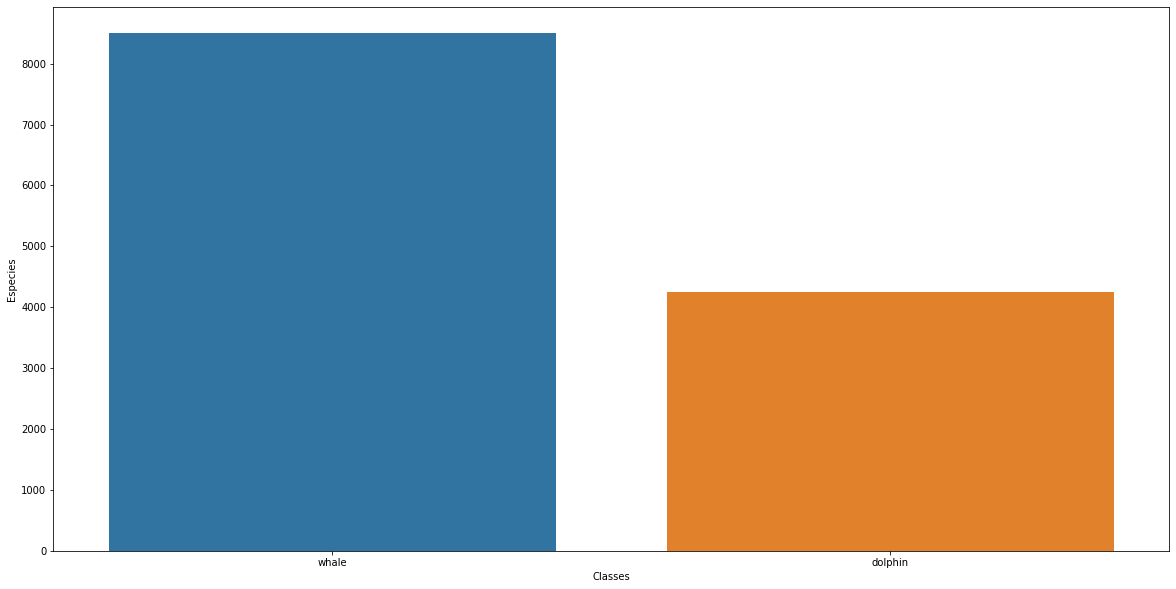

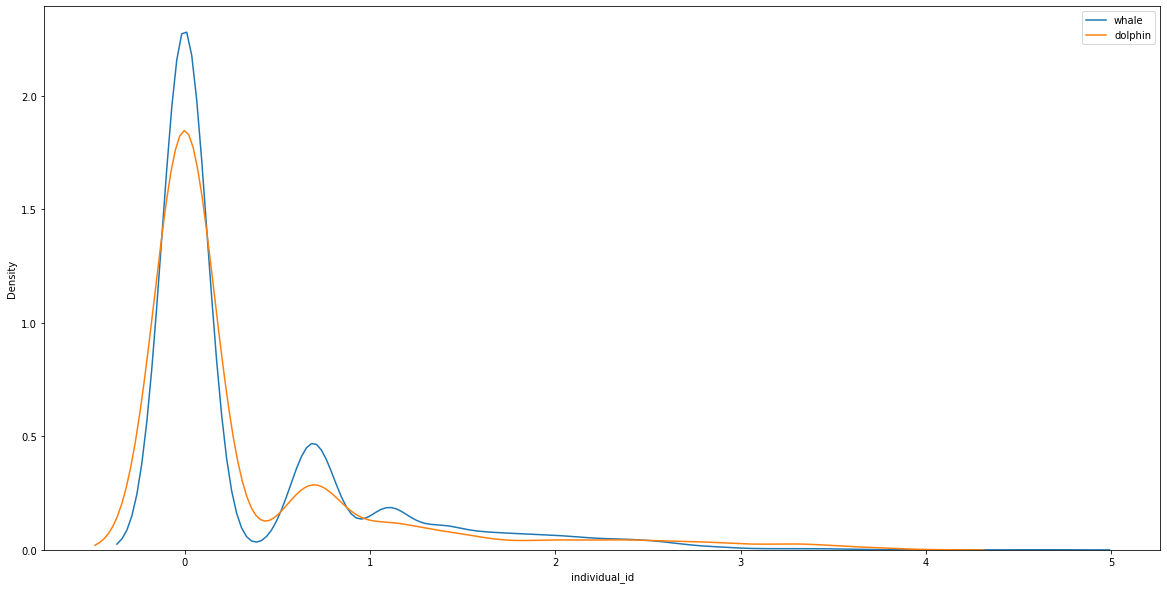

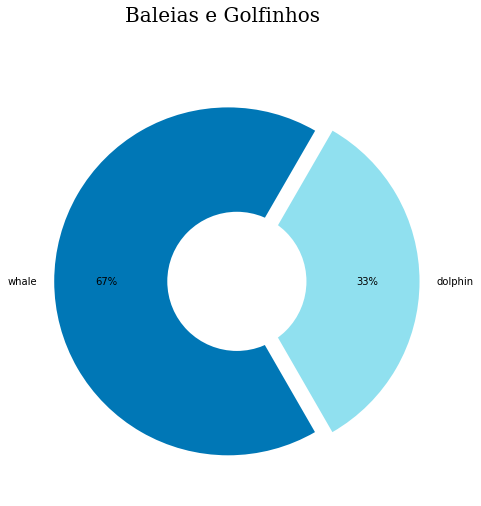

In [5]:
def plot_bar(df):
    df = df.copy()
    class_counts = df['class'].value_counts()
    df = pd.DataFrame({
        'Classes': class_counts.index,
        'Especies': class_counts.values
    })
    plt.figure(figsize = (20,10))
    sns.barplot(x = 'Classes', y = 'Especies', data=df)
    plt.show()
    

def plot_kde(df):
    plt.figure(figsize=(20,10))
    sns.kdeplot(np.log(df.loc[df['class'] == 'whale']['individual_id'].value_counts()))
    sns.kdeplot(np.log(df.loc[df['class'] == 'dolphin']['individual_id'].value_counts()))
    plt.legend(labels = ['whale', 'dolphin'])
    plt.show()
    

def plot_pizza(df):
    fig, ax  = plt.subplots(figsize=(16, 8))
    fig.suptitle('Baleias e Golfinhos', size = 20, font="Serif")
    explode = (0.05, 0.05)
    labels = list(df['class'].value_counts().index)
    sizes = df['class'].value_counts().values
    ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7, colors=["#0077b6","#90e0ef"])
    ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
    plt.show()
    
plot_bar(df)
plot_kde(df)
plot_pizza(df)

# Distribuição das Espécies

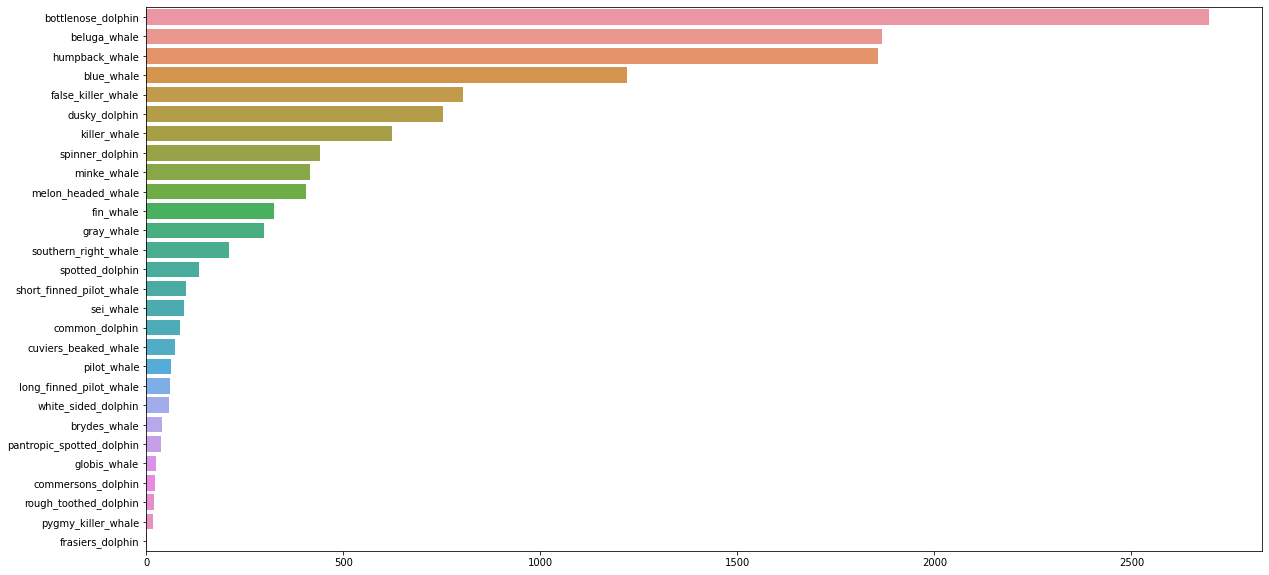

In [6]:
def plot_distribuicao_especies(df):
    df = df['species'].value_counts()
    plt.figure(figsize=(20,10))
    fig = sns.barplot(x = df.values, y=df.index, orient='h')
    

plot_distribuicao_especies(df)

Portanto a nossa base de dados consiste em aprox. 67% de baleias e 33% de golfinhos

# Baleias e Golfinhos Mais Frequentes

In [7]:
print('Top 10 Baleias e Golfinhos')
df['species'].value_counts().head(10)

Top 10 Baleias e Golfinhos


bottlenose_dolphin    2697
beluga_whale          1867
humpback_whale        1856
blue_whale            1219
false_killer_whale     803
dusky_dolphin          752
killer_whale           624
spinner_dolphin        442
minke_whale            415
melon_headed_whale     405
Name: species, dtype: int64

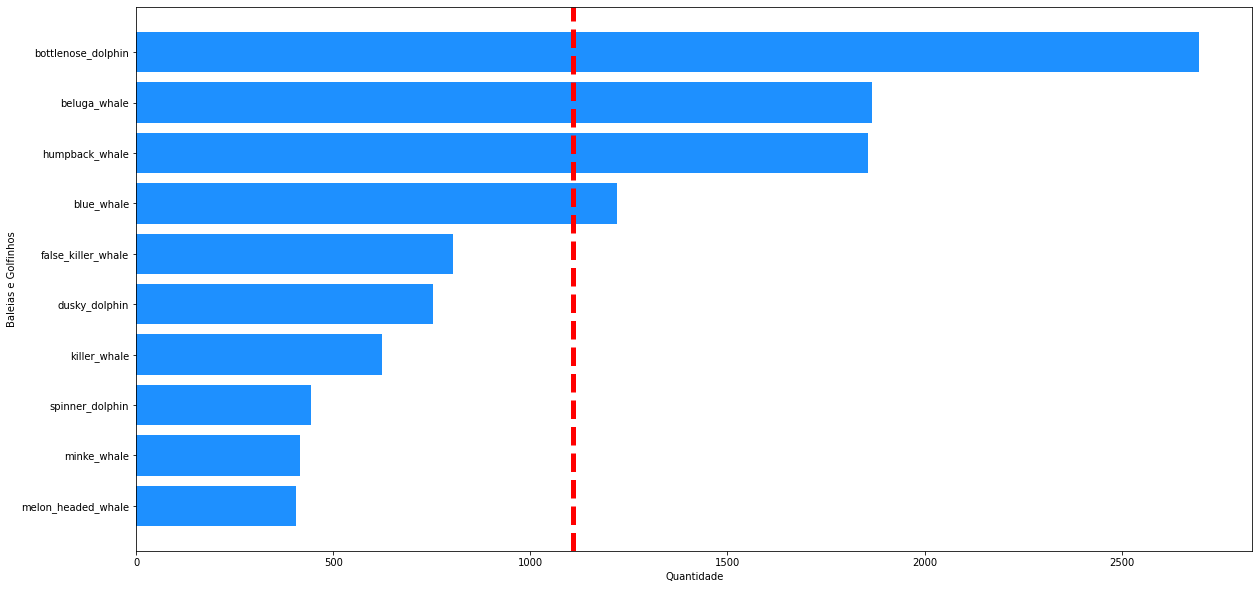

In [8]:
def plot_10_mais(df):
    df = df.copy()
    df = df['species'].value_counts().head(10)[::-1]
    idx = df.index.tolist()
    count = df.values.tolist()
    y = np.arange(10)
    plt.figure(figsize = (20, 10))
    plt.barh(y, count, color='dodgerblue')
    plt.axvline(np.mean(count), ls = '--', color = 'r', linewidth = 5)
    plt.yticks(y, idx)
    plt.xlabel('Quantidade')
    plt.ylabel('Baleias e Golfinhos')
    plt.show()
    
plot_10_mais(df)

# Visualizar Imagens

Visualizando algumas imagens das espécies que mais aparecem

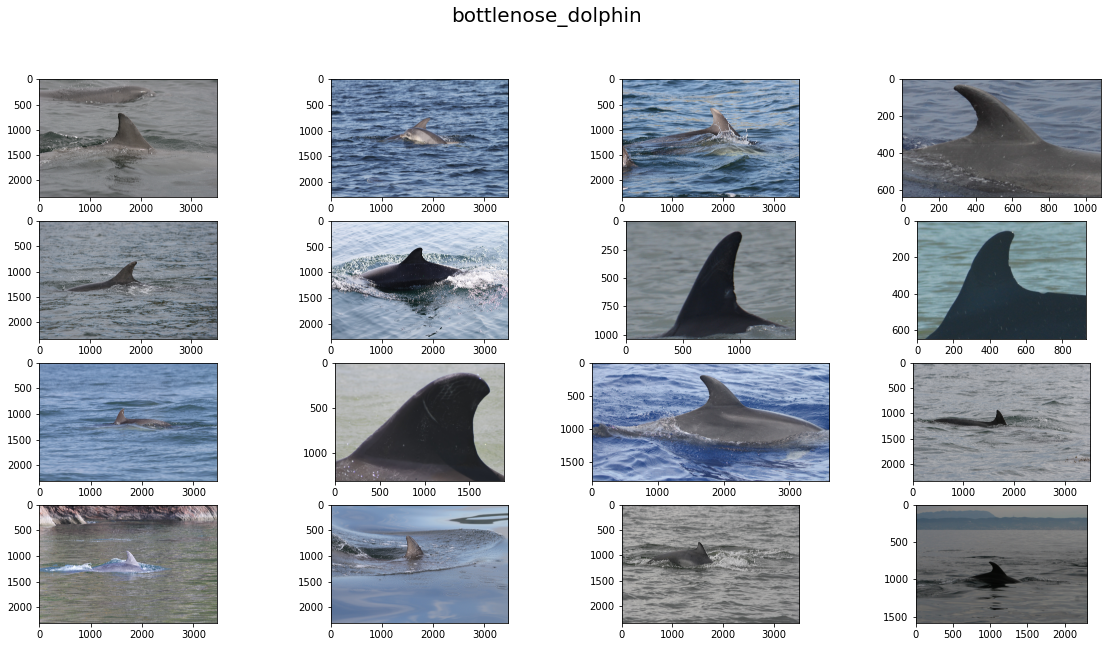

In [ ]:
def exibir_imagens(caminho_arquivos, classe, n_linhas = 4, n_colunas = 4):
    fig, ax = plt.subplots(n_linhas, n_colunas, figsize=(20,10))
    fig.suptitle(classe, fontsize=20)
    quant_imagens = n_linhas * n_colunas
    
    for i in range(quant_imagens):
        img = cv2.imread(caminho_arquivos[i])[:, :, ::-1]
        linha, coluna = (i//n_linhas), (i%n_linhas)
        ax[linha, coluna].imshow(img)    
    
    plt.show()


exibir_imagens(df.loc[df['species']=='bottlenose_dolphin']['img_path'].values[:16], 'bottlenose_dolphin')
exibir_imagens(df.loc[df['species']=='beluga_whale']['img_path'].values[:16], 'beluga_whale')
exibir_imagens(df.loc[df['species']=='humpback_whale']['img_path'].values[:16], 'humpback_whale')
exibir_imagens(df.loc[df['species']=='blue_whale']['img_path'].values[:16], 'blue_whale')
exibir_imagens(df.loc[df['species']=='false_killer_whale']['img_path'].values[:16], 'false_killer_whale')
exibir_imagens(df.loc[df['species']=='dusky_dolphin']['img_path'].values[:16], 'dusky_dolphin')
exibir_imagens(df.loc[df['species']=='killer_whale']['img_path'].values[:16], 'killer_whale')
exibir_imagens(df.loc[df['species']=='spinner_dolphin']['img_path'].values[:16], 'spinner_dolphin')
exibir_imagens(df.loc[df['species']=='minke_whale']['img_path'].values[:16], 'minke_whale')
exibir_imagens(df.loc[df['species']=='melon_headed_whale']['img_path'].values[:16], 'melon_headed_whale')